<img style="float: left;" src="pic2.png">

In [125]:
pd.__version__

'0.23.4'

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

# TimeSeries Data Wrangling

**We can work with time series in different ways**
* datetime, dateutil modules from native python
* np.datetime64 dtype
* pandas timestamp, period, and timedelta types (datetimeindex, periodindex, and timedelta index)
* pytz contain tools with most migrane inducing piece of time series data: time zones

### Native Python date time objects
* datetime
* dateutil

**datetime**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
datetime(year=2019, month=7, day = 4)

datetime.datetime(2019, 7, 4, 0, 0)

In [4]:
datetime(2018, 12, 3)

datetime.datetime(2018, 12, 3, 0, 0)

In [5]:
datetime(12, 3, 2019) # order of arguments is important

ValueError: day is out of range for month

In [6]:
datetime.now() # current day and time

datetime.datetime(2019, 6, 1, 10, 40, 5, 894460)

In [7]:
d1 = datetime(2019, 5, 13)
d2 = datetime(2019, 5, 16, 8, 30, 30)
delta = d2-d1
delta

datetime.timedelta(days=3, seconds=30630)

In [8]:
delta.seconds

30630

**dateutil**

In [9]:
from dateutil import parser
date = parser.parse('4th july 2019') # dateutil you can parse dates from a variety of string formats.
date

datetime.datetime(2019, 7, 4, 0, 0)

In [10]:
parser.parse('july 10, 2019')

datetime.datetime(2019, 7, 10, 0, 0)

In [11]:
parser.parse('2019 jan 15th')

datetime.datetime(2019, 1, 15, 0, 0)

In [12]:
parser.parse('july 10, 2019') - parser.parse('2019 jan 15th')

datetime.timedelta(days=176)

In [13]:
date = parser.parse('4th july 2019')
date

datetime.datetime(2019, 7, 4, 0, 0)

In [14]:
date.strftime('%A') # Once we have a datetime object, then we can do things like getting the day.

'Thursday'

In [15]:
date.strftime('%y')

'19'

In [16]:
date.strftime('%d')

'04'

In [17]:
date.strftime('%m')

'07'

In [18]:
parser.parse('july 10, 2019 8:30:30') - parser.parse('2019 jan 15th 4:20:23')

datetime.timedelta(days=176, seconds=15007)

In [19]:
#datetime and dateutil are pretty powerful because of their flexibility and easy syntax. But they fall 
#short in situations where we want to deal with an array of dates and times

### Numpy np.datetime64 

In [20]:
#numpy team tried to overcome some of the deficiencies of datetime and dateutil with a native time series data type in numpy
# datetime64 which requires a very specific input format

In [21]:
date = np.datetime64('2019-07-04') # for single date
date

numpy.datetime64('2019-07-04')

In [22]:
date + np.arange(5) # power of numpy, we can do vectorized operations on dates

array(['2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
       '2019-07-08'], dtype='datetime64[D]')

In [23]:
# the default fundamental time unit is 'D'. It can be changed to Y,M,W,h, m, s, ms, ns

In [24]:
date = np.datetime64('2019-07-04', 's')
date

numpy.datetime64('2019-07-04T00:00:00')

In [25]:
date + np.arange(5) # now the vectorized operation is on seconds

array(['2019-07-04T00:00:00', '2019-07-04T00:00:01',
       '2019-07-04T00:00:02', '2019-07-04T00:00:03',
       '2019-07-04T00:00:04'], dtype='datetime64[s]')

In [26]:
# for more than one date, we can use np.array with dtype - np.datetime64

In [27]:
date = np.array(['2019-07-04'], dtype=np.datetime64)
date
# this is a numpy array with 1 element whose type is datetime64

array(['2019-07-04'], dtype='datetime64[D]')

In [28]:
dates = np.array(['2019-07-04', '2019-07-05', '2019-07-06'],dtype=np.datetime64)
dates

array(['2019-07-04', '2019-07-05', '2019-07-06'], dtype='datetime64[D]')

In [29]:
np.array('2019-05-24T08:20:30', dtype=np.datetime64) # we can also include time information

array('2019-05-24T08:20:30', dtype='datetime64[s]')

In [30]:
np.array('2019-13-04', dtype=np.datetime64) # But numpy requires specific format y-m-d, otherwise error

ValueError: Cannot create a NumPy datetime other than NaT with generic units

## 1. Pandas: Best of both worlds

* Timestamp type. replacement for python's native datetime, but based on more efficient numpy.datetime64. Associated index structure is DatetimeIndex.
    - For single date object, we can use Timestamp, 
    - for multiple dates,  DatetimeIndex.
    - But with pd.to_datetime, we can initiate both single dates or an array of dates
* Period type. Associated index structure is PeriodIndex.
* Timedelta type. For timedeltas or durations. TimedeltaIndex. Replacement for python's native datetime.timedelta type

### 1.1 Creating date time objects

**pd.to_datetime()**

In [31]:
#It combines the flexibility of native python dataetime and dateutil objects, 
# with the efficient storage and vectorized interface of numpy datetime64 object.

In [32]:
pd.Timestamp('4th march 1978') # timestamp for single date object

Timestamp('1978-03-04 00:00:00')

In [33]:
pd.to_datetime('4th march 1977') # it also returns a timestamp object which is a replacement for pythons native datetime

Timestamp('1977-03-04 00:00:00')

In [129]:
date = pd.to_datetime('Aug2012 1 T07:20:30') # very flexible, order of month, year not important
date

Timestamp('2012-08-01 07:20:30')

**.strftime**

In [39]:
date = pd.to_datetime('May 29, 2019')
date

Timestamp('2019-05-29 00:00:00')

In [36]:
date.strftime('%d')

'29'

In [37]:
date.strftime('%m')

'05'

In [38]:
date.strftime('%H')

'00'

In [40]:
#Fore more info on codes, please see below

<img style="float: left;" src="datetime.png">

In [41]:
#passing a single date to pd.to_datetime() function yields a Timestamp, passing a series of dates yields DatetimeIndex**

In [42]:
pd.to_datetime('20th June 1955') # for a single object we get Timestamp

Timestamp('1955-06-20 00:00:00')

In [43]:
pd.to_datetime(['20th June 1955']) 
# for more than one datetime object or as an array we get DateTimeIndex object

DatetimeIndex(['1955-06-20'], dtype='datetime64[ns]', freq=None)

In [44]:
dates = pd.to_datetime([datetime(2019, 4,3), '4th july 2019', '05-july-2019', '07-09-2019','2019-02-05'])
dates

DatetimeIndex(['2019-04-03', '2019-07-04', '2019-07-05', '2019-07-09',
               '2019-02-05'],
              dtype='datetime64[ns]', freq=None)

In [45]:
pd.DatetimeIndex(['20th June 1955', '30th march 1929', 'Jan 1911, 1', 'july 15 2011', '2019 May 20']) 
# We can also directly use DatetimeIndex methods for multiple dates

DatetimeIndex(['1955-06-20', '1929-03-30', '1911-01-01', '2011-07-15',
               '2019-05-20'],
              dtype='datetime64[ns]', freq=None)

In [46]:
date

Timestamp('2019-05-29 00:00:00')

In [47]:
date + pd.to_timedelta(np.arange(5), 'D') 
# we can also do vectorized operations like with numpy datetime64

DatetimeIndex(['2019-05-29', '2019-05-30', '2019-05-31', '2019-06-01',
               '2019-06-02'],
              dtype='datetime64[ns]', freq=None)

In [48]:
date + pd.to_timedelta(np.arange(5), 's') # secoNd based

DatetimeIndex(['2019-05-29 00:00:00', '2019-05-29 00:00:01',
               '2019-05-29 00:00:02', '2019-05-29 00:00:03',
               '2019-05-29 00:00:04'],
              dtype='datetime64[ns]', freq=None)

**Extracting day, month etc.. from datetime index**

In [49]:
dti = pd.to_datetime(['July 11, 1977', 'aug 1 2019', 'april 3, 1980', '1981 oct 1'])

In [50]:
dti

DatetimeIndex(['1977-07-11', '2019-08-01', '1980-04-03', '1981-10-01'], dtype='datetime64[ns]', freq=None)

In [51]:
dti.day

Int64Index([11, 1, 3, 1], dtype='int64')

In [52]:
dti.dayofweek

Int64Index([0, 3, 3, 3], dtype='int64')

In [53]:
dti.year

Int64Index([1977, 2019, 1980, 1981], dtype='int64')

In [54]:
dti.month

Int64Index([7, 8, 4, 10], dtype='int64')

**.to_period()**

In [55]:
#Any DatetimeIndex can be converted to a PeriodIndex with to_period()

In [56]:
dates = pd.to_datetime([datetime(2019, 4,3), '4th july 2019 8:30:20', '05-july-2019', '07-09-2019','2019-02-05'])
dates

DatetimeIndex(['2019-04-03 00:00:00', '2019-07-04 08:30:20',
               '2019-07-05 00:00:00', '2019-07-09 00:00:00',
               '2019-02-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [57]:
dates.to_period('Y')

PeriodIndex(['2019', '2019', '2019', '2019', '2019'], dtype='period[A-DEC]', freq='A-DEC')

In [58]:
dates.to_period('M')

PeriodIndex(['2019-04', '2019-07', '2019-07', '2019-07', '2019-02'], dtype='period[M]', freq='M')

In [59]:
dates.to_period('D')

PeriodIndex(['2019-04-03', '2019-07-04', '2019-07-05', '2019-07-09',
             '2019-02-05'],
            dtype='period[D]', freq='D')

**pd.to_timedelta()**

In [60]:
pd.to_timedelta(np.arange(5), 'm') # this is a timedeltaindex

TimedeltaIndex(['00:00:00', '00:01:00', '00:02:00', '00:03:00', '00:04:00'], dtype='timedelta64[ns]', freq=None)

In [61]:
# A Timedelta Index is also created when one date is substracted from another

In [62]:
dates

DatetimeIndex(['2019-04-03 00:00:00', '2019-07-04 08:30:20',
               '2019-07-05 00:00:00', '2019-07-09 00:00:00',
               '2019-02-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [63]:
dates - dates[0] # for substracting with prior dates

TimedeltaIndex([   '0 days 00:00:00',   '92 days 08:30:20',
                  '93 days 00:00:00',   '97 days 00:00:00',
                '-57 days +00:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [64]:
dates + pd.to_timedelta(20, 'd') # for adding to dates

DatetimeIndex(['2019-04-23 00:00:00', '2019-07-24 08:30:20',
               '2019-07-25 00:00:00', '2019-07-29 00:00:00',
               '2019-02-25 00:00:00'],
              dtype='datetime64[ns]', freq=None)

**Sequences with dates and times**

* pd.date_range()
* pd.period_range()
* pd.timedelta_range()

**pd.date_range()**

In [72]:
pd.date_range('2015-04-05', '2015-04-10')

DatetimeIndex(['2015-04-05', '2015-04-06', '2015-04-07', '2015-04-08',
               '2015-04-09', '2015-04-10'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range('may 15 2018', periods=10, freq='d') # date doesnt need to follow a particular format

DatetimeIndex(['2018-05-15', '2018-05-16', '2018-05-17', '2018-05-18',
               '2018-05-19', '2018-05-20', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range('2015-04', periods=10, freq='MS')

DatetimeIndex(['2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [73]:
pd.date_range('2015-04-05 01:30:20', periods=10, freq='H')

DatetimeIndex(['2015-04-05 01:30:20', '2015-04-05 02:30:20',
               '2015-04-05 03:30:20', '2015-04-05 04:30:20',
               '2015-04-05 05:30:20', '2015-04-05 06:30:20',
               '2015-04-05 07:30:20', '2015-04-05 08:30:20',
               '2015-04-05 09:30:20', '2015-04-05 10:30:20'],
              dtype='datetime64[ns]', freq='H')

**pd.period_range()**

In [74]:
pd.period_range('2015-04', periods = 8, freq='M')

PeriodIndex(['2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
             '2015-10', '2015-11'],
            dtype='period[M]', freq='M')

**pd.timedelta_range()**

In [75]:
pd.timedelta_range(0, periods=5, freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq='D')

In [76]:
pd.timedelta_range('01:20:30','08:20:30',freq='H') # four hourly 

TimedeltaIndex(['01:20:30', '02:20:30', '03:20:30', '04:20:30', '05:20:30',
                '06:20:30', '07:20:30', '08:20:30'],
               dtype='timedelta64[ns]', freq='H')

In [77]:
pd.timedelta_range('01:20:30','08:20:30',freq='T') # by minutes

TimedeltaIndex(['01:20:30', '01:21:30', '01:22:30', '01:23:30', '01:24:30',
                '01:25:30', '01:26:30', '01:27:30', '01:28:30', '01:29:30',
                ...
                '08:11:30', '08:12:30', '08:13:30', '08:14:30', '08:15:30',
                '08:16:30', '08:17:30', '08:18:30', '08:19:30', '08:20:30'],
               dtype='timedelta64[ns]', length=421, freq='T')

In [78]:
pd.timedelta_range('0:0:1', '0:0:6', freq='S') # by seconds

TimedeltaIndex(['00:00:01', '00:00:02', '00:00:03', '00:00:04', '00:00:05',
                '00:00:06'],
               dtype='timedelta64[ns]', freq='S')

**Pandas Time Series Frequency Codes**

* D  - Calendar day
* W - Weekly
* M - Month end
* Q - Quarter end
* A - Year end
* H - Hours
* T - Minutes
* S - Seconds
* L - Milliseconds
* U - Microseconds
* N - Nanoseconds

* B - Business day
* BM - Business month end
* BQ - Business quarter end
* BA - Business year end
* BH -  Business hours
* adding an S to any of these will conver it to the begninng instead of end. Ex: MS - Month start
* we can also change the month or day of a week by Q-JAN, W-SUN etc.


In [79]:
pd.date_range('july 10, 2019', periods=10, freq='B')

DatetimeIndex(['2019-07-10', '2019-07-11', '2019-07-12', '2019-07-15',
               '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19',
               '2019-07-22', '2019-07-23'],
              dtype='datetime64[ns]', freq='B')

In [80]:
# codes can also be combined for different frequencies

In [81]:
pd.date_range('july 10, 2019', periods=10, freq='2H30T')

DatetimeIndex(['2019-07-10 00:00:00', '2019-07-10 02:30:00',
               '2019-07-10 05:00:00', '2019-07-10 07:30:00',
               '2019-07-10 10:00:00', '2019-07-10 12:30:00',
               '2019-07-10 15:00:00', '2019-07-10 17:30:00',
               '2019-07-10 20:00:00', '2019-07-10 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [83]:
pd.date_range('july 10, 2019', periods=10, freq='WOM-3FRI') # 3rd friday in a month

DatetimeIndex(['2019-07-19', '2019-08-16', '2019-09-20', '2019-10-18',
               '2019-11-15', '2019-12-20', '2020-01-17', '2020-02-21',
               '2020-03-20', '2020-04-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### 1.2 Pandas Time Series and Indexing

**Power of Pandas can be seen more clearly when we index with dates for a series**

In [84]:
dindex = pd.DatetimeIndex(['20th June 1955', '30th march 1929', 'april 2 1911', 'april 3, 1911', 'Jan 1911, 1', 'july 15 2011', '2019 May 20']) 
dindex

DatetimeIndex(['1955-06-20', '1929-03-30', '1911-04-02', '1911-04-03',
               '1911-01-01', '2011-07-15', '2019-05-20'],
              dtype='datetime64[ns]', freq=None)

In [85]:
dseries = pd.Series([1,2,3, 4, 5, 6, 7], index = dindex)
dseries

1955-06-20    1
1929-03-30    2
1911-04-02    3
1911-04-03    4
1911-01-01    5
2011-07-15    6
2019-05-20    7
dtype: int64

In [86]:
# once we have a series indexed by day-time, we can do normal indexing operations

In [88]:
dseries.loc['1955-06-20':'2011-07-15'] # explicit indexing works based on dates in ascending order

1955-06-20    1
2011-07-15    6
dtype: int64

In [89]:
dseries.loc['1911-01-01':'2019-07-15']

1955-06-20    1
1929-03-30    2
1911-04-02    3
1911-04-03    4
1911-01-01    5
2011-07-15    6
2019-05-20    7
dtype: int64

In [90]:
dseries['1929-03-30':'2011-07-15'] 
#without .loc also works with explicit indexing. But better to use .loc

1955-06-20    1
1929-03-30    2
2011-07-15    6
dtype: int64

In [91]:
dseries

1955-06-20    1
1929-03-30    2
1911-04-02    3
1911-04-03    4
1911-01-01    5
2011-07-15    6
2019-05-20    7
dtype: int64

In [92]:
dseries.iloc[0:2] # implicit indexing

1955-06-20    1
1929-03-30    2
dtype: int64

In [93]:
dseries['1911'] #special additional date only indexing operations such as passing the year

1911-04-02    3
1911-04-03    4
1911-01-01    5
dtype: int64

In [94]:
dseries['1910':'2011'] 

1955-06-20    1
1929-03-30    2
1911-04-02    3
1911-04-03    4
1911-01-01    5
2011-07-15    6
dtype: int64

In [95]:
dseries['1911-04'] # year and month

1911-04-02    3
1911-04-03    4
dtype: int64

In [98]:
dseries2 = pd.Series(range(8), pd.date_range('may 01, 2019', periods = 8, freq='d'))
dseries2

2019-05-01    0
2019-05-02    1
2019-05-03    2
2019-05-04    3
2019-05-05    4
2019-05-06    5
2019-05-07    6
2019-05-08    7
Freq: D, dtype: int64

In [99]:
dseries2['2019-05-03':'2019-05-07']

2019-05-03    2
2019-05-04    3
2019-05-05    4
2019-05-06    5
2019-05-07    6
Freq: D, dtype: int64

In [102]:
# all the above indexing will work for dataframes as well with index as dates

In [103]:
# indexing dates in a time series is slightly different from general series

In [104]:
cseries = pd.Series([1,2,3,4, 5], index = ['e', 'a', 'c', 'b', 'd'])
cseries

e    1
a    2
c    3
b    4
d    5
dtype: int64

In [105]:
cseries['e':'d']

e    1
a    2
c    3
b    4
d    5
dtype: int64

In [106]:
cseries['a':'e'] # indexing is not ascending for general series
# But for datetimeindex, explicit indexing works in ascending order

Series([], dtype: int64)

**Operations on series**

In [107]:
s1 = pd.Series([1,2,3], index = pd.DatetimeIndex(['June 20, 2018', 'June 21, 2018', 'June 22, 2018']))
s1

2018-06-20    1
2018-06-21    2
2018-06-22    3
dtype: int64

In [108]:
s1 + s1

2018-06-20    2
2018-06-21    4
2018-06-22    6
dtype: int64

### 1.3 Few important methods for series indexed with dates

**Combining series based on dates**

**.append()**

In [109]:
s1 = pd.Series([1,2,3], index = pd.to_datetime(['4th july 2019', '05-july-2019', '07-06-2019']))
s1

2019-07-04    1
2019-07-05    2
2019-07-06    3
dtype: int64

In [112]:
s2 = pd.Series([1,2,3], index = pd.to_datetime(['8th july 2019', '09-july-2019', '07-10-2019']))
s2

2019-07-08    1
2019-07-09    2
2019-07-10    3
dtype: int64

In [113]:
s3 = s1.append(s2) 
s3

2019-07-04    1
2019-07-05    2
2019-07-06    3
2019-07-08    1
2019-07-09    2
2019-07-10    3
dtype: int64

**.truncate**

In [114]:
s3.truncate('2019-07-06')

2019-07-06    3
2019-07-08    1
2019-07-09    2
2019-07-10    3
dtype: int64

### PANDAS was developed largely with finance context in mind

### 1.4 Few Time Series techniques

**We can read financial data from a number of sources such as yahoo through pandas datareader**

In [117]:
from pandas_datareader import data # need to pip install pandas-datareader

In [118]:
nvidia_stock = data.DataReader('NVDA', start='2005-01-02', end='2019-05-24', data_source='yahoo')

In [119]:
nvidia_stock.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,8.24,7.826667,8.126667,7.86,26667900.0,7.251520
2005-01-04,7.93,7.370000,7.916667,7.49,19755600.0,6.910161
2005-01-05,7.65,7.370000,7.410000,7.56,18120300.0,6.974743


In [120]:
nvidia_stock.index

DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05', '2005-01-06',
               '2005-01-07', '2005-01-10', '2005-01-11', '2005-01-12',
               '2005-01-13', '2005-01-14',
               ...
               '2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24'],
              dtype='datetime64[ns]', name='Date', length=3623, freq=None)

In [121]:
nvidia_stock.shape

(3623, 6)

In [122]:
nvidia = nvidia_stock['Close']
nvidia.head(3)

Date
2005-01-03    7.86
2005-01-04    7.49
2005-01-05    7.56
Name: Close, dtype: float64

In [123]:
nvidia.shape

(3623,)

In [131]:
nvidia.head(10)

Date
2005-01-03    7.860000
2005-01-04    7.490000
2005-01-05    7.560000
2005-01-06    7.486667
2005-01-07    7.343333
2005-01-10    7.360000
2005-01-11    7.133333
2005-01-12    7.073333
2005-01-13    7.146667
2005-01-14    7.170000
Name: Close, dtype: float64

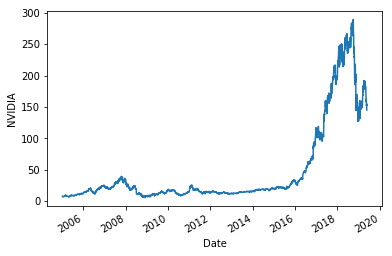

In [124]:
nvidia.plot()
plt.ylabel('NVIDIA')
plt.show()

**.resample()**

In [132]:
print (nvidia.resample('BA').mean().shape)
nvidia.resample('BA').mean() # takes the average over the year. Its an aggregation 

(15,)


Date
2005-12-30      9.513823
2006-12-29     18.095963
2007-12-31     27.724542
2008-12-31     15.945613
2009-12-31     11.850873
2010-12-31     13.563175
2011-12-30     16.887540
2012-12-31     13.507880
2013-12-31     14.189127
2014-12-31     18.547064
2015-12-31     23.718254
2016-12-30     53.761190
2017-12-29    149.783705
2018-12-31    232.384143
2019-12-31    163.598899
Freq: BA-DEC, Name: Close, dtype: float64

**.asfreq()**

In [133]:
print (nvidia.asfreq('BA').shape)
nvidia.asfreq('BA') # takes the year end value

(14,)


Date
2005-12-30     12.186666
2006-12-29     24.673334
2007-12-31     34.020000
2008-12-31      8.070000
2009-12-31     18.680000
2010-12-31     15.400000
2011-12-30     13.860000
2012-12-31     12.260000
2013-12-31     16.020000
2014-12-31     20.049999
2015-12-31     32.959999
2016-12-30    106.739998
2017-12-29    193.500000
2018-12-31    133.500000
Freq: BA-DEC, Name: Close, dtype: float64

In [134]:
print (nvidia.asfreq('D').shape)
nvidia.asfreq('D')[0:10] 
# when we specify D, it takes the end of day value even for the holidays and puts missing values 
# ..where values are not present

(5255,)


Date
2005-01-03    7.860000
2005-01-04    7.490000
2005-01-05    7.560000
2005-01-06    7.486667
2005-01-07    7.343333
2005-01-08         NaN
2005-01-09         NaN
2005-01-10    7.360000
2005-01-11    7.133333
2005-01-12    7.073333
Freq: D, Name: Close, dtype: float64

In [135]:
nvidia.asfreq('D', method = 'pad')[0:10] # with pad, it forward fills the values.
# .asfreq() accepts a method argument as to how to fill values instead of leaving as NA the up-sampled points.

Date
2005-01-03    7.860000
2005-01-04    7.490000
2005-01-05    7.560000
2005-01-06    7.486667
2005-01-07    7.343333
2005-01-08    7.343333
2005-01-09    7.343333
2005-01-10    7.360000
2005-01-11    7.133333
2005-01-12    7.073333
Freq: D, Name: Close, dtype: float64

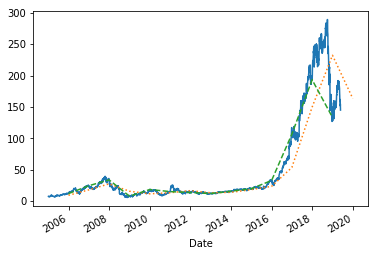

In [136]:
nvidia.plot(style='-')
nvidia.resample('BA').mean().plot(style=':') # data aggregation
nvidia.asfreq('BA').plot(style='--') # just reports the value at the end of the year. data selection
plt.show()

**Time-shifts**

In [137]:
nvidia_d = nvidia.asfreq('D', method='pad')
print (nvidia_d.shape)
nvidia_d.head()
# here we just upsampled nvidia closing price data with a daily frequency and imputed missed
# values with forward fill

(5255,)


Date
2005-01-03    7.860000
2005-01-04    7.490000
2005-01-05    7.560000
2005-01-06    7.486667
2005-01-07    7.343333
Freq: D, Name: Close, dtype: float64

**.shift()** - to shift data

In [138]:
nvidia_s = nvidia_d.shift(300)
print (nvidia_s.shape)
nvidia_s.head() # Data has been shifted by 300 days. FIRST 300 Values will be NaN. 

(5255,)


Date
2005-01-03   NaN
2005-01-04   NaN
2005-01-05   NaN
2005-01-06   NaN
2005-01-07   NaN
Freq: D, Name: Close, dtype: float64

In [139]:
nvidia_s.isnull().sum(0) # 

300

In [140]:
# the shifts above can also take freq argument based on which the data can be shifted.

**.tshift()** - to shift the index

In [141]:
nvidia_t = nvidia_d.tshift(300)
nvidia_t.shape

(5255,)

In [142]:
nvidia_d.head(5)

Date
2005-01-03    7.860000
2005-01-04    7.490000
2005-01-05    7.560000
2005-01-06    7.486667
2005-01-07    7.343333
Freq: D, Name: Close, dtype: float64

In [143]:
nvidia_t.head() # here index has shifted. Beginning index is moved by 300 days..

Date
2005-10-30    7.860000
2005-10-31    7.490000
2005-11-01    7.560000
2005-11-02    7.486667
2005-11-03    7.343333
Freq: D, Name: Close, dtype: float64

**1 Year ROI for investing in Nvidia stock**

In [144]:
nvidia_d.head(3)

Date
2005-01-03    7.86
2005-01-04    7.49
2005-01-05    7.56
Freq: D, Name: Close, dtype: float64

In [145]:
nvidia_t = nvidia_d.tshift(-365)
nvidia_t.head(3)

Date
2004-01-04    7.86
2004-01-05    7.49
2004-01-06    7.56
Freq: D, Name: Close, dtype: float64

In [146]:
nvidia_t[365:].head(3)

Date
2005-01-03    12.740000
2005-01-04    13.096666
2005-01-05    13.393333
Freq: D, Name: Close, dtype: float64

In [147]:
(nvidia_t-nvidia_d).head(5)

Date
2004-01-04   NaN
2004-01-05   NaN
2004-01-06   NaN
2004-01-07   NaN
2004-01-08   NaN
Freq: D, Name: Close, dtype: float64

In [148]:
pdiff_1y = nvidia_t-nvidia_d
pdiff_1y.head() # some values will be NaNs because index was shifted earlier

Date
2004-01-04   NaN
2004-01-05   NaN
2004-01-06   NaN
2004-01-07   NaN
2004-01-08   NaN
Freq: D, Name: Close, dtype: float64

In [149]:
pdiff_1y[pdiff_1y.notnull()].head()

Date
2005-01-03    4.880000
2005-01-04    5.606667
2005-01-05    5.833333
2005-01-06    6.126667
2005-01-07    6.270000
Freq: D, Name: Close, dtype: float64

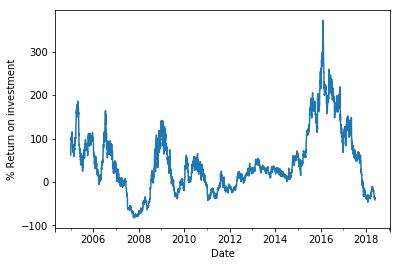

In [150]:
roi_1y = 100*(nvidia_t/nvidia_d-1)
roi_1y.plot()
plt.ylabel('% Return on investment')
plt.show()

**Rolling Windows**

In [152]:
nvidia_d.head()

Date
2005-01-03    7.860000
2005-01-04    7.490000
2005-01-05    7.560000
2005-01-06    7.486667
2005-01-07    7.343333
Freq: D, Name: Close, dtype: float64

In [153]:
roll = nvidia_d.rolling(3,center=False).mean() # basically moving average
roll.head()

Date
2005-01-03         NaN
2005-01-04         NaN
2005-01-05    7.636667
2005-01-06    7.512222
2005-01-07    7.463333
Freq: D, Name: Close, dtype: float64

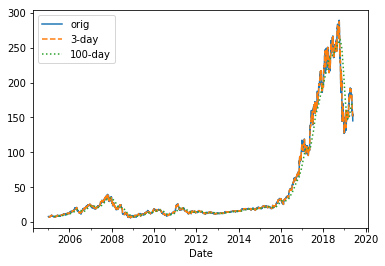

In [154]:
nvidia_d.plot(label = 'orig')
nvidia_d.rolling(3,center=False).mean().plot(style = '--', label = '3-day')
nvidia_d.rolling(100,center=False).mean().plot(style = ':', label = '100-day')
plt.legend()
plt.show()

## 2. Exploratory Data Analytics

In [157]:
bicycle = pd.read_csv('Bicycle.csv')
bicycle.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,04/30/2019 11:00:00 PM,8.0,16.0
1,04/30/2019 10:00:00 PM,15.0,29.0
2,04/30/2019 09:00:00 PM,17.0,54.0
3,04/30/2019 08:00:00 PM,58.0,91.0
4,04/30/2019 07:00:00 PM,106.0,175.0


In [158]:
type(bicycle['Date'][0]) #dates are stored as strings. 

str

In [159]:
bicycle = pd.read_csv('Bicycle.csv', index_col = 'Date', parse_dates=True)
bicycle.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [160]:
bicycle.index # now the index is a DatetimeIndex, which is what we want

DatetimeIndex(['2019-04-30 23:00:00', '2019-04-30 22:00:00',
               '2019-04-30 21:00:00', '2019-04-30 20:00:00',
               '2019-04-30 19:00:00', '2019-04-30 18:00:00',
               '2019-04-30 17:00:00', '2019-04-30 16:00:00',
               '2019-04-30 15:00:00', '2019-04-30 14:00:00',
               ...
               '2012-10-03 09:00:00', '2012-10-03 08:00:00',
               '2012-10-03 07:00:00', '2012-10-03 06:00:00',
               '2012-10-03 05:00:00', '2012-10-03 04:00:00',
               '2012-10-03 03:00:00', '2012-10-03 02:00:00',
               '2012-10-03 01:00:00', '2012-10-03 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=57624, freq=None)

In [161]:
bicycle.shape

(57624, 2)

In [162]:
bicycle.index.to_period('Y')

PeriodIndex(['2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019',
             '2019', '2019',
             ...
             '2012', '2012', '2012', '2012', '2012', '2012', '2012', '2012',
             '2012', '2012'],
            dtype='period[A-DEC]', name='Date', length=57624, freq='A-DEC')

**Lets do simple preprocessing**

In [163]:
bicycle.columns = ['East', 'West']
bicycle.head(3)

,East,West
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0


In [164]:
bicycle['Total'] = bicycle['East']+bicycle['West']
bicycle.head(3)

,East,West,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0


### 2.1 Visualizing the data

In [165]:
bicycle.head(3)

,East,West,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0


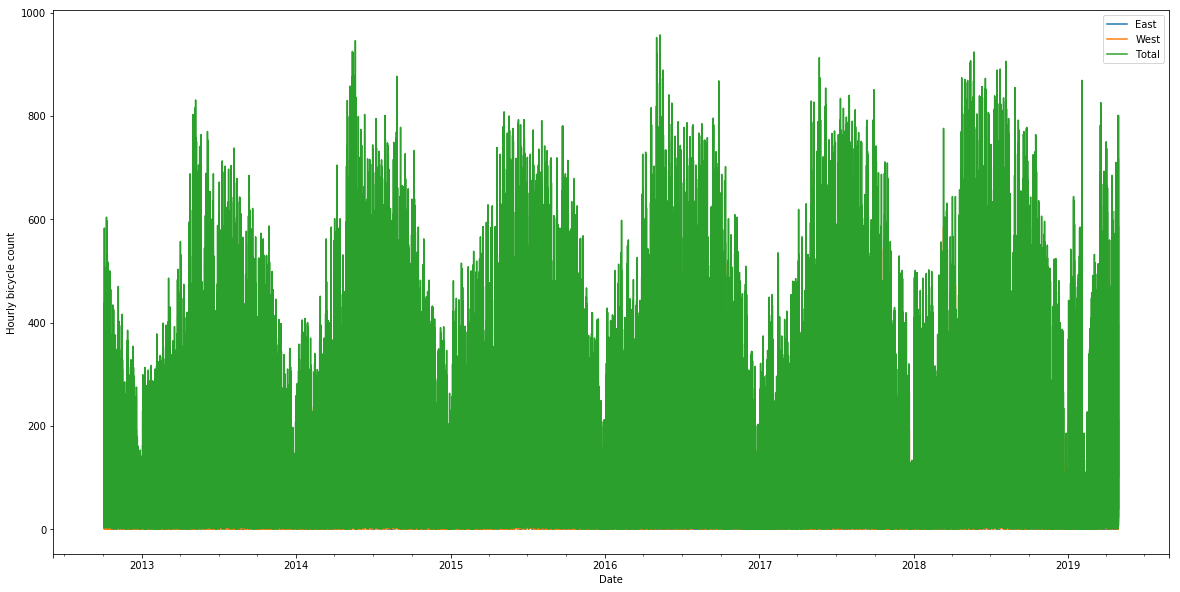

In [166]:
plt.rcParams.update({'figure.figsize':(20,10)})

bicycle.plot() # hard to see the data since there are too many observations
plt.ylabel('Hourly bicycle count')
plt.show()
# hard to see the data since there are too many observations

**Lets resample the data by weekly sum**

In [167]:
bicycle_weekly = bicycle.resample('W').sum()
bicycle_weekly.shape 

(344, 3)

In [168]:
bicycle_weekly.head(3)

,East,West,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0


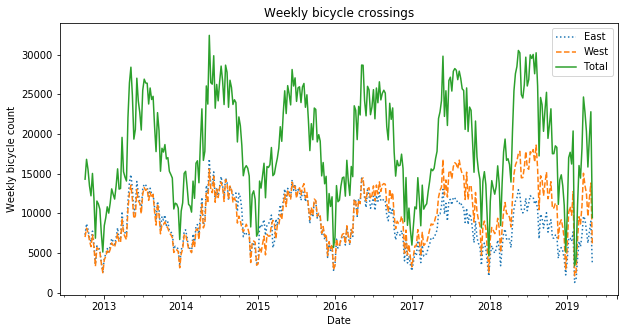

In [169]:
bicycle_weekly.plot(style = [':', '--', '-'], figsize = (10,5))
plt.ylabel('Weekly bicycle count')
plt.title('Weekly bicycle crossings')
plt.show()

**Rolling mean can be leveraged for smoothing**

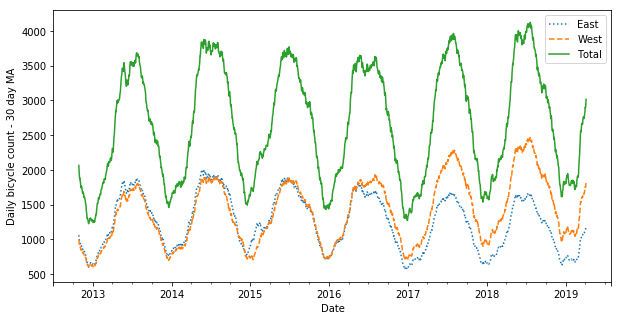

In [173]:
bicycle_daily = bicycle.resample('D').sum() # resampling by day
bicycle_daily.rolling(50, center=True).mean().plot(style = [':', '--', '-'], figsize = (10,5))
plt.ylabel('Daily bicycle count - 30 day MA')
plt.show()

In [178]:
bicycle.head(24)

,East,West,Total
Date,,,
2019-04-30 23:00:00,8.0,16.0,24.0
2019-04-30 22:00:00,15.0,29.0,44.0
2019-04-30 21:00:00,17.0,54.0,71.0
2019-04-30 20:00:00,58.0,91.0,149.0
2019-04-30 19:00:00,106.0,175.0,281.0
2019-04-30 18:00:00,142.0,371.0,513.0
2019-04-30 17:00:00,214.0,587.0,801.0
2019-04-30 16:00:00,113.0,346.0,459.0
2019-04-30 15:00:00,68.0,113.0,181.0


**Grouping on Datetime Index**

In [175]:
bicycle.groupby(bicycle.index.time).mean()
# average number of bicycle counts at different times (for the 24 hours)

,East,West,Total
00:00:00,4.980008,6.605581,11.585589
01:00:00,2.770929,3.327780,6.098709
02:00:00,1.990818,2.074290,4.065109
03:00:00,1.558517,1.427738,2.986256
04:00:00,3.521866,3.055394,6.577259
05:00:00,16.246147,9.552270,25.798417
06:00:00,56.058726,34.042066,90.100791
07:00:00,146.492711,79.658892,226.151603
08:00:00,197.052062,121.780092,318.832153
09:00:00,105.874167,80.383333,186.257500


**Plotting the same**

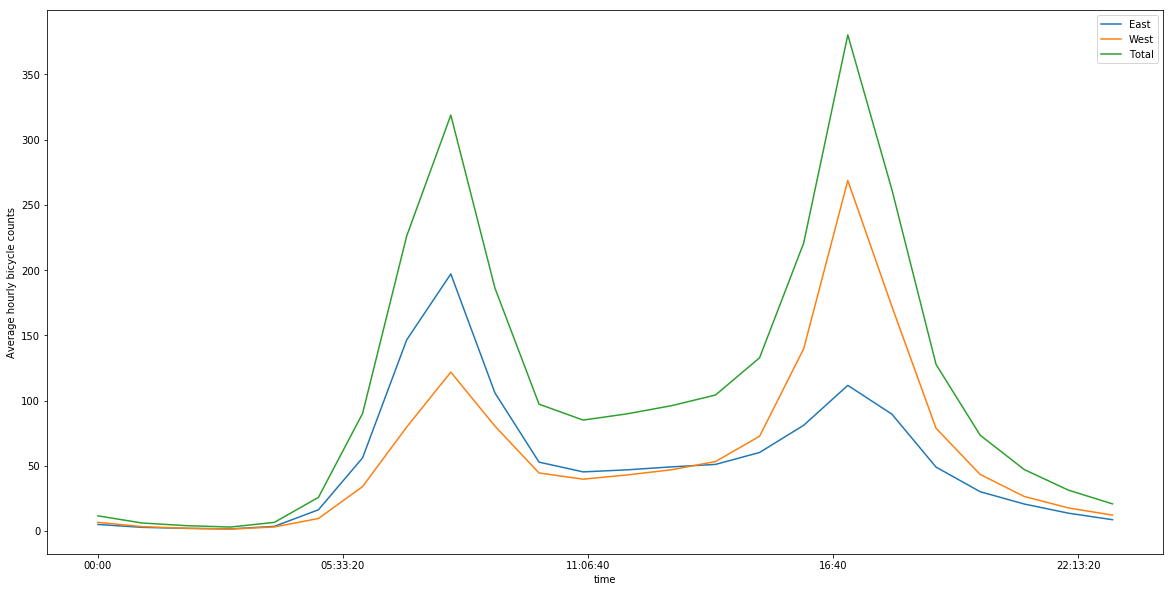

In [176]:
bicycle.groupby(bicycle.index.time).mean().plot()
plt.ylabel('Average hourly bicycle counts')
plt.show()
#early morning around 8.00 AM and 5 PM is the heaviest traffic.

In [177]:
bicycle.groupby(bicycle.index.month).mean() #mean monthly averages

,East,West,Total
Date,,,
1,36.538018,39.959485,76.497504
2,35.016497,37.925338,72.941836
3,43.872189,50.692293,94.564482
4,53.635570,59.997023,113.632592
5,74.505376,79.628584,154.133961
6,71.535201,79.568782,151.103983
7,74.006048,83.706317,157.712366
8,68.513889,80.403450,148.917339
9,60.315972,68.462731,128.778704


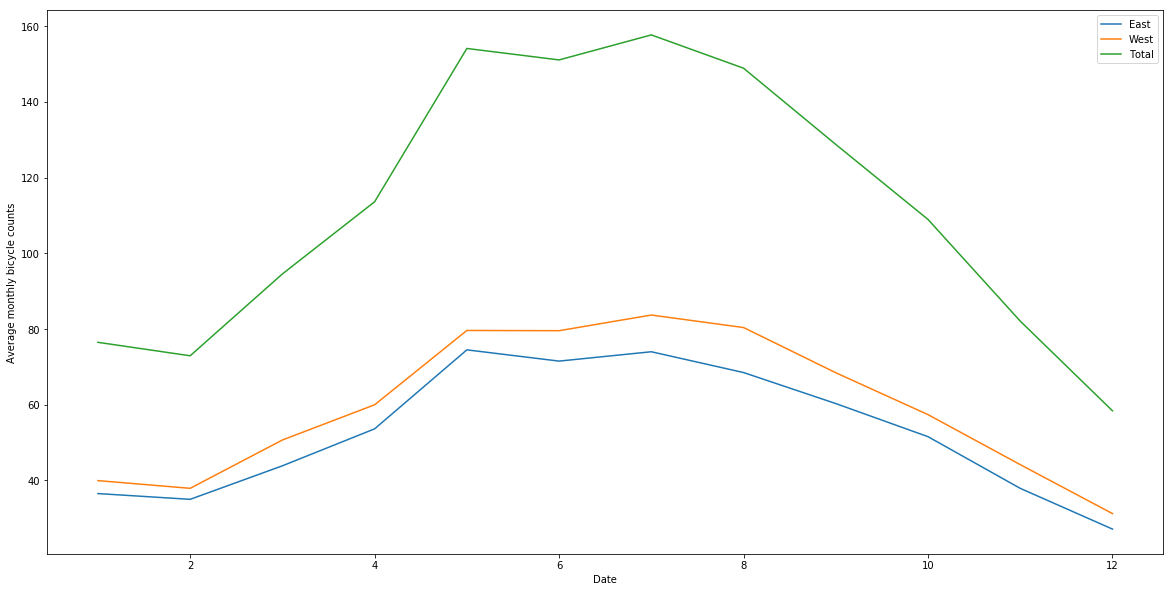

In [179]:
bicycle.groupby(bicycle.index.month).mean().plot() # for mean monthly variations
plt.ylabel('Average monthly bicycle counts')
plt.show()

**More grouping and plotting (Extras)**

In [180]:
week = np.where(bicycle.index.weekday < 5, 'Weekday', 'Weekend') 
np.unique(week)

array(['Weekday', 'Weekend'], dtype='<U7')

In [181]:
bicycle_time = bicycle.groupby([week, bicycle.index.time]).mean()

In [182]:
bicycle_time

East        West       Total
Weekday 00:00:00    4.264723    5.510204    9.774927
        01:00:00    2.210496    2.574344    4.784840
        02:00:00    1.631487    1.612245    3.243732
        03:00:00    1.448980    1.302041    2.751020
        04:00:00    4.259475    3.363848    7.623324
        05:00:00   21.140525   12.062974   33.203499
        06:00:00   75.206997   44.176093  119.383090
        07:00:00  198.321283  105.543440  303.864723
        08:00:00  263.200583  159.452478  422.653061
        09:00:00  131.140607   97.528588  228.669195
        10:00:00   52.835473   44.530922   97.366394
        11:00:00   38.870478   33.998250   72.868728
        12:00:00   38.797550   36.219953   75.017503
        13:00:00   40.948688   40.151603   81.100292
        14:00:00   43.288630   48.701458   91.990087
        15:00:00   56.618076   76.103790  132.721866
        16:00:00   88.268805  171.927697  260.196501
        17:00:00  135.285714  356.065306  491.351020
        18:00:00  108.954519  225.468222  334.422741
        19:00:00   57.787755   99.488047  157.275802
        20:00:00   34.585423   52.442566   87.027988
        21:00:00   23.579009   30.919534   54.498542
        22:00:00   15.153936   19.913703   35.067638
        23:00:00    9.172012   12.932362   22.104373
Weekend 00:00:00    6.768222    9.344023   16.112245
        01:00:00    4.172012    5.211370    9.383382
        02:00:00    2.895742    3.237885    6.133627
        03:00:00    1.832362    1.741983    3.574344
        04:00:00    1.677843    2.284257    3.962099
        05:00:00    4.010204    3.275510    7.285714
        06:00:00    8.188047    8.706997   16.895044
        07:00:00   16.921283   14.947522   31.868805
        08:00:00   31.680758   27.599125   59.279883
        09:00:00   42.744898   37.545190   80.290087
        10:00:00   52.586006   44.214286   96.800292
        11:00:00   61.313411   53.983965  115.297376
        12:00:00   67.014577   59.753644  126.768222
        13:00:00   69.564140   63.721574  133.285714
        14:00:00   70.341108   64.425656  134.766764
        15:00:00   69.026239   63.864431  132.890671
        16:00:00   62.935860   59.239067  122.174927
        17:00:00   52.431487   50.297376  102.728863
        18:00:00   41.024781   38.556851   79.581633
        19:00:00   26.895044   26.913994   53.809038
        20:00:00   18.880466   20.555394   39.435860
        21:00:00   13.307580   15.190962   28.498542
        22:00:00    9.846939   12.055394   21.902332
        23:00:00    7.255102   10.157434   17.412536

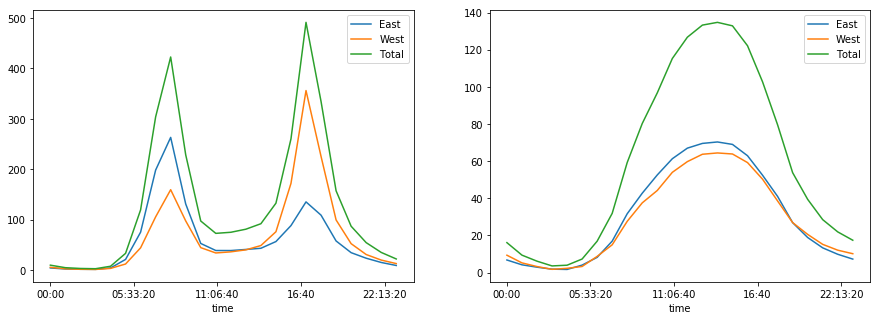

In [183]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
bicycle_time.loc['Weekday'].plot(ax=ax[0])
bicycle_time.loc['Weekend'].plot(ax=ax[1])
plt.show()

**TimeZones (Extras)**

In [ ]:
import pytz 

In [ ]:
pytz.common_timezones[-5:] # US time zones

In [ ]:
pd.date_range('05 15 2019 8:30:30', periods = 14, freq='D', tz = 'UTC') # To explicilty define TZ

In [ ]:
dates = pd.date_range('05 15 2019 8:30:30', periods = 14, freq='D')
dates = dates.tz_localize('US/Pacific')
dates
# if time zone was not first defined, then tz-localize() can be used to define a time zone

In [ ]:
dates.tz_convert('US/Eastern')

In [ ]:
print (pytz.common_timezones)